In [56]:
#import

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np



In [9]:
#dwl images from cirfa10

(train_images, train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 30s 0us/step


In [10]:
#normalize pixel values between 0 and 1

train_images, test_images =train_images/255.0 , test_images/255.0

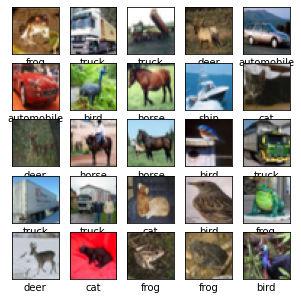

In [15]:
#   verification des données
#draw 25 first images

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(5,5))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [19]:
#model creation

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

history= model.fit(train_images,train_labels,epochs=10, validation_data=(test_images,test_labels))


2021-09-05 02:29:20.683680: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-05 02:29:20.715398: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/10
1563/1563 [==============================] - 116s 73ms/step - loss: 1.7634 - accuracy: 0.3429 - val_loss: 1.2587 - val_accuracy: 0.5466
Epoch 2/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.1846 - accuracy: 0.5736 - val_loss: 1.0579 - val_accuracy: 0.6261
Epoch 3/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.0304 - accuracy: 0.6377 - val_loss: 1.0489 - val_accuracy: 0.6385
Epoch 4/10
1563/1563 [==============================] - 123s 79ms/step - loss: 0.9027 - accuracy: 0.6825 - val_loss: 0.9276 - val_accuracy: 0.6771
Epoch 5/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.8327 - accuracy: 0.7050 - val_loss: 0.9146 - val_accuracy: 0.6846
Epoch 6/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.7737 - accuracy: 0.7286 - val_loss: 0.8661 - val_accuracy: 0.7022
Epoch 7/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.7156 - accuracy: 0.7480 - val_loss: 0

313/313 - 8s - loss: 0.8543 - accuracy: 0.7090


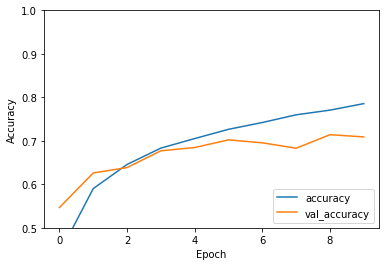

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)

In [23]:
print(test_acc)

0.7089999914169312


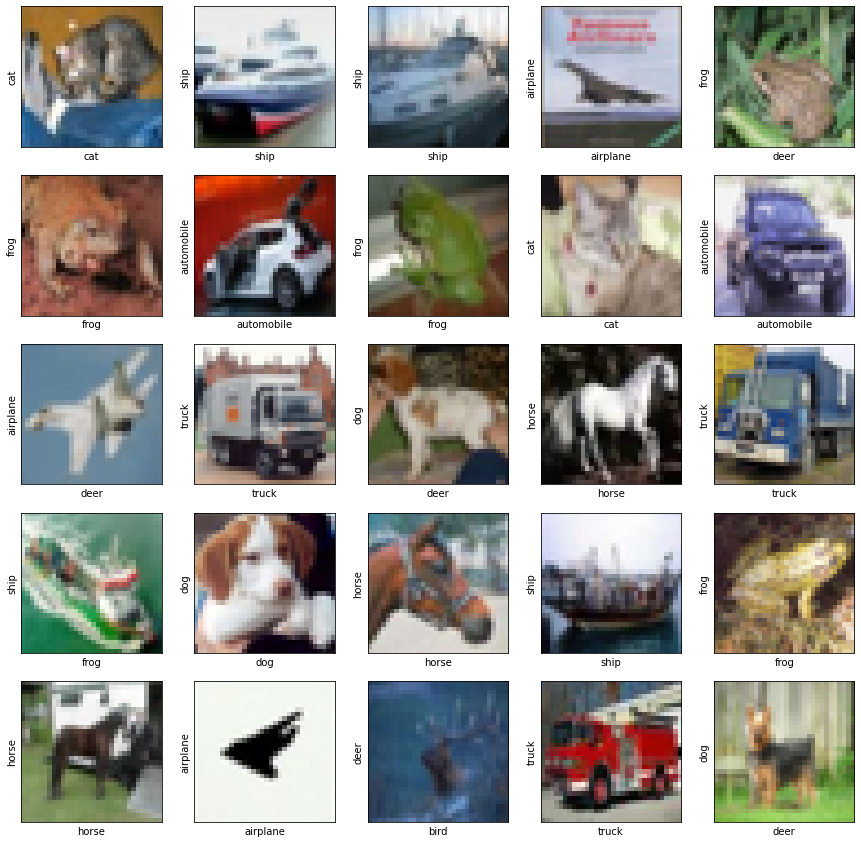

In [60]:
#   verification des données
#draw 25 first images_test

#class_names

plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.ylabel(class_names[test_labels[i][0]])

    img=tf.keras.preprocessing.image.img_to_array(test_images[i])
    img = tf.expand_dims(img, 0)
    predictions=model.predict(img)
    score = tf.nn.softmax(predictions[0])


    plt.xlabel(class_names[np.argmax(score)])


plt.show()